In [343]:
import numpy as np
import pandas as pd

In [344]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Download and Collect the data

In [345]:
rawdata = pd.read_sas('LLCP2023.XPT', format='xport')

In [346]:
rawdata.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,_RFSEAT2,_RFSEAT3,_DRNKDRV
0,1.0,1.0,b'03012023',b'03',b'01',b'2023',1100.0,b'2023000001',2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,2.0,2.0,2.0,1.0,1.0,9.0
1,1.0,1.0,b'01062023',b'01',b'06',b'2023',1100.0,b'2023000002',2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0,1.0,1.0,9.0
2,1.0,1.0,b'03082023',b'03',b'08',b'2023',1100.0,b'2023000003',2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0,1.0,1.0,9.0
3,1.0,1.0,b'03062023',b'03',b'06',b'2023',1100.0,b'2023000004',2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,1.0,1.0,1.0,9.0
4,1.0,1.0,b'01062023',b'01',b'06',b'2023',1100.0,b'2023000005',2.023000e+09,1.0,...,7.000000e+00,1.0,4.700000e+01,1.0,2.0,1.0,2.0,1.0,1.0,2.0


In [347]:
# select the column we need to use
'''
Each variable has their meaning as follows
'DIABETE4'  : (Ever told) you had diabetes << this is our dependent variable
'_BMI5'     : Computed body mass index
'_RFBMI5'   : Overweight or obese calculated variable
'_RFHYPE6'  : High Blood Pressure Calculated Variable
'TOLDHI3'   : Ever Told Cholesterol Is High
'_CHOLCH3'  : Cholesterol Checked Calculated Variable
'CHCKDNY2'  : Ever told you have kidney disease?
'SMOKE100'  : Smoked at Least 100 Cigarettes
'_RFDRHV8'  : Heavy Alcohol Consumption  Calculated Variable
'CVDSTRK3'  : Ever Diagnosed with a Stroke
'_MICHD'    : Ever had CHD or MI
'_TOTINDA'  : Leisure Time Physical Activity Calculated Variable
'GENHLTH'   : General Health
'PHYSHLTH'  : Number of Days Physical Health Not Good
'MENTHLTH'  : Number of Days Mental Health Not Good
'DIFFWALK'  : Difficulty Walking or Climbing Stairs
'_HLTHPL1'  : Have any health insurance
'MEDCOST1'  : Could Not Afford To See Doctor
'CHECKUP1'  : Length of time since last routine checkup
'_SEX'      : Calculated sex variable
'_AGEG5YR'  : Reported age in five-year age categories calculated variable
'EDUCA'     : Computed level of education completed categories
'INCOME3'   : Computed income categories
'''

selected_columns = ['DIABETE4', '_BMI5', '_RFBMI5', '_RFHYPE6', 
                    'TOLDHI3', '_CHOLCH3', 'CHCKDNY2', 'SMOKE100',
                    '_RFDRHV8', 'CVDSTRK3', '_MICHD', '_TOTINDA',
                    'GENHLTH', 'PHYSHLTH', 'MENTHLTH',
                    'DIFFWALK', '_HLTHPL1', 'MEDCOST1', 'CHECKUP1',
                    '_SEX', '_AGEG5YR', 'EDUCA', 'INCOME3']

In [348]:
# extract the select columns onto new dataframe
data = rawdata[selected_columns]

##### Perform EDA procedures

In [349]:
data.head()

,DIABETE4,_BMI5,_RFBMI5,_RFHYPE6,TOLDHI3,_CHOLCH3,CHCKDNY2,SMOKE100,_RFDRHV8,CVDSTRK3,...,PHYSHLTH,MENTHLTH,DIFFWALK,_HLTHPL1,MEDCOST1,CHECKUP1,_SEX,_AGEG5YR,EDUCA,INCOME3
0,1.0,3047.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,...,88.0,88.0,1.0,1.0,2.0,2.0,2.0,13.0,5.0,99.0
1,3.0,2856.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,...,88.0,88.0,2.0,1.0,2.0,2.0,2.0,13.0,5.0,99.0
2,3.0,2231.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,...,6.0,2.0,1.0,1.0,1.0,1.0,2.0,13.0,4.0,2.0
3,3.0,2744.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,...,2.0,88.0,1.0,1.0,2.0,3.0,2.0,12.0,5.0,99.0
4,1.0,2585.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,...,88.0,88.0,1.0,1.0,2.0,1.0,2.0,12.0,5.0,7.0


In [350]:
data.shape

(433323, 23)

In [351]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433323 entries, 0 to 433322
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DIABETE4  433318 non-null  float64
 1   _BMI5     392788 non-null  float64
 2   _RFBMI5   433323 non-null  float64
 3   _RFHYPE6  433323 non-null  float64
 4   TOLDHI3   381511 non-null  float64
 5   _CHOLCH3  433323 non-null  float64
 6   CHCKDNY2  433320 non-null  float64
 7   SMOKE100  413649 non-null  float64
 8   _RFDRHV8  433323 non-null  float64
 9   CVDSTRK3  433319 non-null  float64
 10  _MICHD    428738 non-null  float64
 11  _TOTINDA  433323 non-null  float64
 12  GENHLTH   433319 non-null  float64
 13  PHYSHLTH  433320 non-null  float64
 14  MENTHLTH  433320 non-null  float64
 15  DIFFWALK  417177 non-null  float64
 16  _HLTHPL1  433323 non-null  float64
 17  MEDCOST1  433321 non-null  float64
 18  CHECKUP1  433321 non-null  float64
 19  _SEX      433323 non-null  float64
 20  _AGE

In [352]:
data.isna().sum()

DIABETE4        5
_BMI5       40535
_RFBMI5         0
_RFHYPE6        0
TOLDHI3     51812
_CHOLCH3        0
CHCKDNY2        3
SMOKE100    19674
_RFDRHV8        0
CVDSTRK3        4
_MICHD       4585
_TOTINDA        0
GENHLTH         4
PHYSHLTH        3
MENTHLTH        3
DIFFWALK    16146
_HLTHPL1        0
MEDCOST1        2
CHECKUP1        2
_SEX            0
_AGEG5YR        0
EDUCA           9
INCOME3      8075
dtype: int64

In [353]:
'''we could erase this codeblock'''
# if we try to dropna, we will 
print(f'If we drop the data, we still have {data.dropna().shape[0]} rows to work with.')
print(f'Btw, we lost the data by {round(((1 - (data.dropna().shape[0] / data.shape[0]))*100),2)} percent.')

If we drop the data, we still have 338867 rows to work with.
Btw, we lost the data by 21.8 percent.


In [354]:
# If we go with dropping it, then.
data.dropna(inplace=True)

/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/1347236882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


##### Data Cleansing
In accordance with Codebook's description, we found that we still need to do some data cleansing for analysis purpose before proceed. We will go through each columns as follows:

In [355]:
# 1. DIABETE4
'''
3, and 4 as 0 (no diabetes identified)
1, and 2 as 1 (diabetes identified)

drop 7, and 9 from the datasets
'''

# drop the value 7 and 9
data.drop(data[(data['DIABETE4'] == 7) | (data['DIABETE4'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['DIABETE4'] = data['DIABETE4'].replace({1:1, 2:1, 3:0, 4:0})

# check the value
data['DIABETE4'].unique()

/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/457564763.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['DIABETE4'] == 7) | (data['DIABETE4'] == 9)].index, inplace=True)
/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/457564763.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DIABETE4'] = data['DIABETE4'].replace({1:1, 2:1, 3:0, 4:0})


array([1., 0.])

In [356]:
# 2. _BMI5
'''
Divide the provided values by 100. then do the roundings into nearest integer.

No particular integer to drop.
'''

data['_BMI5'] = round(data['_BMI5']/100, 0)

/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/3511828738.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['_BMI5'] = round(data['_BMI5']/100, 0)


In [357]:
# 3. _RFBMI5
'''
1 as 0 (not overweight or obese)
2 as 1 (overweight or obese)

drop 9 from the datasets
'''

# drop the value 7 and 9
data.drop(data[(data['_RFBMI5'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['_RFBMI5'] = data['_RFBMI5'].replace({1:0, 2:1})

# check the value
data['_RFBMI5'].unique()

/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/2961610834.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['_RFBMI5'] == 9)].index, inplace=True)
/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/2961610834.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['_RFBMI5'] = data['_RFBMI5'].replace({1:0, 2:1})


array([1., 0.])

In [358]:
# 4. _RFHYPE6
'''
1 as 0 (no high blood pressure identified)
2 as 1 (high blood pressure identified)

drop 7, and 9 from the datasets
'''

# drop the value 7 and 9
data.drop(data[(data['_RFHYPE6'] == 7) | (data['_RFHYPE6'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['_RFHYPE6'] = data['_RFHYPE6'].replace({1:0, 2:1})

# check the value
data['_RFHYPE6'].unique()

/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/92290913.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['_RFHYPE6'] == 7) | (data['_RFHYPE6'] == 9)].index, inplace=True)
/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/92290913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['_RFHYPE6'] = data['_RFHYPE6'].replace({1:0, 2:1})


array([1., 0.])

In [359]:
# 5. TOLDHI3
'''
2 as 0 (no high cholesterol identified)
1 as 1 (high chloresterol identified) >> leave it as it is.

drop 7 and 9 from datasets
'''
# drop the value 7 and 9
data.drop(data[(data['TOLDHI3'] == 7) | (data['TOLDHI3'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['TOLDHI3'] = data['TOLDHI3'].replace({2:0})

# check the value
data['TOLDHI3'].unique()


/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/2361962716.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['TOLDHI3'] == 7) | (data['TOLDHI3'] == 9)].index, inplace=True)
/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/2361962716.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TOLDHI3'] = data['TOLDHI3'].replace({2:0})


array([0., 1.])

In [360]:
# 6. _CHOLCH3
'''
2, and 3 as 0 (no cholesterol check up for the past 5 years)
1 as 1 (cholesterol check up for the past 5 years) >> leave it as it is.

drop 7 and 9 from datasets
'''
# drop the value 7 and 9
data.drop(data[(data['_CHOLCH3'] == 7) | (data['_CHOLCH3'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['_CHOLCH3'] = data['_CHOLCH3'].replace({2:0, 3:0})

# check the value
data['_CHOLCH3'].unique()

/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/459788979.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['_CHOLCH3'] == 7) | (data['_CHOLCH3'] == 9)].index, inplace=True)
/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/459788979.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['_CHOLCH3'] = data['_CHOLCH3'].replace({2:0, 3:0})


array([1., 0.])

In [361]:
# 7. CHCKDNY2
'''
2 as 0 (no kidney disease identified)
1 as 1 (kidney disease identified (uncontrollable urine flow)) >> leave it as it is.

drop 7 and 9 from datasets
'''
# drop the value 7 and 9
data.drop(data[(data['CHCKDNY2'] == 7) | (data['CHCKDNY2'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['CHCKDNY2'] = data['CHCKDNY2'].replace({2:0})

# check the value
data['CHCKDNY2'].unique()

/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/2061910287.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['CHCKDNY2'] == 7) | (data['CHCKDNY2'] == 9)].index, inplace=True)
/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/2061910287.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CHCKDNY2'] = data['CHCKDNY2'].replace({2:0})


array([0., 1.])

In [362]:
# 8. SMOKE100
'''
2 as 0 (no smoking for the last 100 days)
1 as 1 (smoking for the last 100 days) >> leave it as it is.

drop 7 and 9 from datasets
'''
# drop the value 7 and 9
data.drop(data[(data['SMOKE100'] == 7) | (data['SMOKE100'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['SMOKE100'] = data['SMOKE100'].replace({2:0})

# check the value
data['SMOKE100'].unique()

/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/2222861531.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['SMOKE100'] == 7) | (data['SMOKE100'] == 9)].index, inplace=True)
/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/2222861531.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMOKE100'] = data['SMOKE100'].replace({2:0})


array([0., 1.])

In [363]:
# 9. _RFDRHV8
'''
1 as 0 (not a heavy drinker)
2 as 1 (heavy drinker)

drop 9 from datasets
'''
# drop the value 9
data.drop(data[(data['_RFDRHV8'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['_RFDRHV8'] = data['_RFDRHV8'].replace({2:1, 1:0})

# check the value
data['_RFDRHV8'].unique()

/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/825886196.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['_RFDRHV8'] == 9)].index, inplace=True)
/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/825886196.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['_RFDRHV8'] = data['_RFDRHV8'].replace({2:1, 1:0})


array([0., 1.])

In [364]:
# 10. CVDSTRK3
'''
2 as 0 (no chronic health conditions identified)
1 as 1 (chronic health conditions identified) >> leave it as it is.

drop 7 and 9 from datasets
'''
# drop the value 7 and 9
data.drop(data[(data['CVDSTRK3'] == 7) | (data['CVDSTRK3'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['CVDSTRK3'] = data['CVDSTRK3'].replace({2:0})

# check the value
data['CVDSTRK3'].unique()

/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/2344862667.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['CVDSTRK3'] == 7) | (data['CVDSTRK3'] == 9)].index, inplace=True)
/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/2344862667.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CVDSTRK3'] = data['CVDSTRK3'].replace({2:0})


array([0., 1.])

In [365]:
# 11. _MICHD
'''
2 as 0 (no historical CHD or MI identified)
1 as 1 (historical CHD or MI identified) >> leave it as it is.

no values to be dropped
'''

# replace the remaining value into binary
data['_MICHD'] = data['_MICHD'].replace({2:0})

# check the value
data['_MICHD'].unique()

/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/2227250140.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['_MICHD'] = data['_MICHD'].replace({2:0})


array([0., 1.])

In [366]:
# 12. _TOTINDA
'''
2 as 0 (no physical activity/exercise identified)
1 as 1 (physical activity/exercise identified) >> leave it as it is.

drop 9 from datasets
'''
# drop the value 7 and 9
data.drop(data[(data['_TOTINDA'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['_TOTINDA'] = data['_TOTINDA'].replace({2:0})

# check the value
data['_TOTINDA'].unique()

/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/3381710374.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['_TOTINDA'] == 9)].index, inplace=True)
/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/3381710374.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['_TOTINDA'] = data['_TOTINDA'].replace({2:0})


array([0., 1.])

In [367]:
# 13. GENHLTH
'''
We will leave ordinal number (1-5) as it is

drop 7, and 9 from datasets
'''
# drop the value 7 and 9
data.drop(data[(data['GENHLTH'] == 7) | (data['GENHLTH'] == 9)].index, inplace=True)

# check the value
data['GENHLTH'].unique()

/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/2857721127.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['GENHLTH'] == 7) | (data['GENHLTH'] == 9)].index, inplace=True)


array([2., 4., 3., 1., 5.])

In [368]:
# 14. PHYSHLTH
'''
88 as 0 (no bad health days identified)
we will leave 0-30, as a ordinal number, as it is

drop 77, and 99 from datasets
'''
# drop the value 77 and 99
data.drop(data[(data['PHYSHLTH'] == 77) | (data['PHYSHLTH'] == 99)].index, inplace=True)

# replace the remaining value
data['PHYSHLTH'] = data['PHYSHLTH'].replace({88:0})

# check the value
data['PHYSHLTH'].unique()

/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/1040999692.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['PHYSHLTH'] == 77) | (data['PHYSHLTH'] == 99)].index, inplace=True)
/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/1040999692.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PHYSHLTH'] = data['PHYSHLTH'].replace({88:0})


array([ 0.,  6.,  2.,  8.,  1.,  5.,  4., 15., 30., 21., 10., 25., 14.,
        7., 20.,  3., 12., 26., 24., 18., 13., 28., 16., 17., 11., 22.,
       27.,  9., 29., 23., 19.])

In [369]:
# 15. MENTHLTH
'''
88 as 0 (no bad health days identified)
we will leave 0-30, as a ordinal number, as it is

drop 77, and 99 from datasets
'''
# drop the value 77 and 99
data.drop(data[(data['MENTHLTH'] == 77) | (data['MENTHLTH'] == 99)].index, inplace=True)

# replace the remaining value
data['MENTHLTH'] = data['MENTHLTH'].replace({88:0})

# check the value
data['MENTHLTH'].unique()

/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/2701334721.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['MENTHLTH'] == 77) | (data['MENTHLTH'] == 99)].index, inplace=True)
/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/2701334721.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MENTHLTH'] = data['MENTHLTH'].replace({88:0})


array([ 0.,  2.,  3., 25., 10., 30., 20., 15.,  5., 12.,  4.,  1.,  6.,
       21.,  7., 14., 29.,  8., 16., 17.,  9., 28., 11., 18., 22., 24.,
       13., 27., 26., 19., 23.])

In [370]:
# 16. DIFFWALK
'''
2 as 0 (no difficulty in walking/climbing stairs identified)
1 as 1 (difficulty in walking/climbing stairs identified) >> leave it as it is

drop 7, and 9 from datasets
'''
# drop the value 7 and 9
data.drop(data[(data['DIFFWALK'] == 7) | (data['DIFFWALK'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['DIFFWALK'] = data['DIFFWALK'].replace({2:0})

# check the value
data['DIFFWALK'].unique()

/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/3760655220.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['DIFFWALK'] == 7) | (data['DIFFWALK'] == 9)].index, inplace=True)
/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/3760655220.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DIFFWALK'] = data['DIFFWALK'].replace({2:0})


array([1., 0.])

In [371]:
# 17. _HLTHPL1
'''
2 as 0 (no healthcare access identified)
1 as 1 (healthcare access identified) >> leave it as it is

drop 7, and 9 from datasets
'''
# drop the value 7 and 9
data.drop(data[(data['_HLTHPL1'] == 7) | (data['_HLTHPL1'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['_HLTHPL1'] = data['_HLTHPL1'].replace({2:0})

# check the value
data['_HLTHPL1'].unique()

/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/3997274657.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['_HLTHPL1'] == 7) | (data['_HLTHPL1'] == 9)].index, inplace=True)
/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/3997274657.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['_HLTHPL1'] = data['_HLTHPL1'].replace({2:0})


array([1., 0.])

In [372]:
# 18. MEDCOST1
'''
2 as 0 (could afford to see doctor)
1 as 1 (couldn't afford to see the doctor) >> leave it as it is

drop 7, and 9 from datasets
'''
# drop the value 7 and 9
data.drop(data[(data['MEDCOST1'] == 7) | (data['MEDCOST1'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['MEDCOST1'] = data['MEDCOST1'].replace({2:0})

# check the value
data['MEDCOST1'].unique()

/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/170583058.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['MEDCOST1'] == 7) | (data['MEDCOST1'] == 9)].index, inplace=True)
/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/170583058.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MEDCOST1'] = data['MEDCOST1'].replace({2:0})


array([0., 1.])

In [373]:
# 19. CHECKUP1
'''
we leave ordinal column (1-4) as it is.
change 8 to 5 as never check up.

drop 7, an 9 from datasets.
'''
# drop the value 7 and 9
data.drop(data[(data['CHECKUP1'] == 7) | (data['CHECKUP1'] == 9)].index, inplace=True)

# replace the remaining value into binary
data['CHECKUP1'] = data['CHECKUP1'].replace({8:5})

# check the value
data['CHECKUP1'].unique()

/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/2710424494.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['CHECKUP1'] == 7) | (data['CHECKUP1'] == 9)].index, inplace=True)
/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/2710424494.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CHECKUP1'] = data['CHECKUP1'].replace({8:5})


array([2., 1., 3., 5., 4.])

In [374]:
# 20. _SEX
'''
2 as 0 (female)
1 as 1 (mens tend to have more chance of diabetees)
'''
# replace the remaining value into binary
data['_SEX'] = data['_SEX'].replace({2:0})

# check the value
data['_SEX'].unique()

/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/88195152.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['_SEX'] = data['_SEX'].replace({2:0})


array([0., 1.])

In [375]:
# 21. _AGEG5YR
'''
we will leave ordinal values (1-13) as it is.

drop 14 from datasets.
'''
# drop the value 14
data.drop(data[(data['_AGEG5YR'] == 14)].index, inplace=True)

# check the value
data['_AGEG5YR'].unique()

/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/2569284760.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['_AGEG5YR'] == 14)].index, inplace=True)


array([13., 12.,  9.,  8., 10., 11.,  6.,  4.,  5.,  7.,  2.,  1.,  3.])

In [376]:
# 22. EDUCA
'''
we will leave ordinal values (1-6) as it is.

drop 9 from datasets.
'''
# drop the value 9
data.drop(data[(data['EDUCA'] == 9)].index, inplace=True)

# check the value
data['EDUCA'].unique()

/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/1024242661.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['EDUCA'] == 9)].index, inplace=True)


array([5., 4., 6., 3., 2., 1.])

In [377]:
# 23. INCOME3
'''
we will leave ordinal values (1-11) as it is.

drop 77, and 99 from datasets.
'''
# drop the value 77 and 99
data.drop(data[(data['INCOME3'] == 77) | (data['INCOME3'] == 99)].index, inplace=True)

# check the value
data['INCOME3'].unique()

/var/folders/9r/y51gvs0x5gl01kt2pv552qmm0000gn/T/ipykernel_4894/1267642251.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['INCOME3'] == 77) | (data['INCOME3'] == 99)].index, inplace=True)


array([ 2.,  7.,  6.,  9.,  3.,  5.,  4.,  8., 11., 10.,  1.])

In [378]:
data.groupby(['DIABETE4']).size()

DIABETE4
0.0    220064
1.0     39787
dtype: int64

In [379]:
data = data.rename(columns={
    'DIABETE4'  : 'Diabetes_Status',            # Diabetes awareness (No/Pre-diabetes/Diabetes)
    '_BMI5'     : 'BMI',                        # Body Mass Index
    '_RFBMI5'   : 'Obesity_Indicator',          # Obesity indicator (BMI >= 30)
    '_RFHYPE6'  : 'Hypertension',               # Hypertension diagnosis
    'TOLDHI3'   : 'High_Cholesterol',           # High cholesterol diagnosis
    '_CHOLCH3'  : 'Cholesterol_Checked',        # Cholesterol checked in the past 5 years
    'CHCKDNY2'  : 'Chronic_Kidney_Disease',     # Chronic kidney disease diagnosis
    'SMOKE100'  : 'Smoker_100_Cigarettes',      # Smoked at least 100 cigarettes in lifetime
    '_RFDRHV8'  : 'Heavy_Alcohol_Consumption',  # Heavy alcohol consumption
    'CVDSTRK3'  : 'Stroke',                     # Stroke diagnosis
    '_MICHD'    : 'Heart_Disease',              # Coronary heart disease or heart attack
    '_TOTINDA'  : 'Physical_Activity',          # Physical activity indicator
    'GENHLTH'   : 'General_Health',             # Self-rated general health status
    'PHYSHLTH'  : 'Physical_Unhealthy_Days',    # Number of physically unhealthy days
    'MENTHLTH'  : 'Mental_Unhealthy_Days',      # Number of mentally unhealthy days
    'DIFFWALK'  : 'Difficulty_Walking',         # Difficulty walking or climbing stairs
    '_HLTHPL1'  : 'Health_Care_Coverage',       # Health care coverage indicator
    'MEDCOST1'  : 'Doctor_Visit_Cost_Issue',    # Could not see doctor due to cost
    'CHECKUP1'  : 'Last_Checkup',               # Last routine check-up timeframe
    '_SEX'      : 'Gender',                     # Gender (Male/Female)
    '_AGEG5YR'  : 'Age_Group',                  # Age group in 5-year intervals
    'EDUCA'     : 'Education_Level',            # Education level
    'INCOME3'   : 'Income_Level'                # Annual income level
})

print("Renamed Columns:")
print(data.columns)

Renamed Columns:
Index(['Diabetes_Status', 'BMI', 'Obesity_Indicator', 'Hypertension',
       'High_Cholesterol', 'Cholesterol_Checked', 'Chronic_Kidney_Disease',
       'Smoker_100_Cigarettes', 'Heavy_Alcohol_Consumption', 'Stroke',
       'Heart_Disease', 'Physical_Activity', 'General_Health',
       'Physical_Unhealthy_Days', 'Mental_Unhealthy_Days',
       'Difficulty_Walking', 'Health_Care_Coverage', 'Doctor_Visit_Cost_Issue',
       'Last_Checkup', 'Gender', 'Age_Group', 'Education_Level',
       'Income_Level'],
      dtype='object')


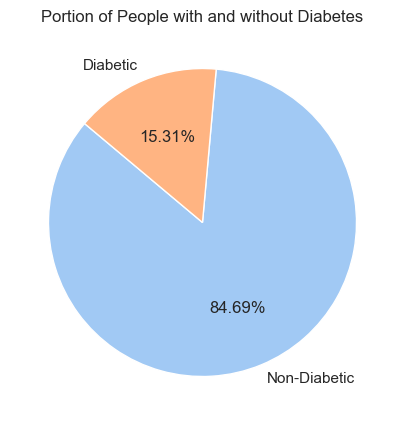

In [380]:
values = data['Diabetes_Status'].value_counts()
labels = ['Non-Diabetic', 'Diabetic']

# Use a Seaborn color palette
colors = sns.color_palette('pastel', n_colors=2)  # Use pastel colors

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    x=values, 
    labels=labels, 
    autopct='%.2f%%', 
    startangle=140, 
    colors=colors
)
plt.title('Portion of People with and without Diabetes')
#plt.savefig('1.Portion of People with and without Diabetes.png', format='png', dpi=300)  # Save as PNG with 300 DPI
plt.show()

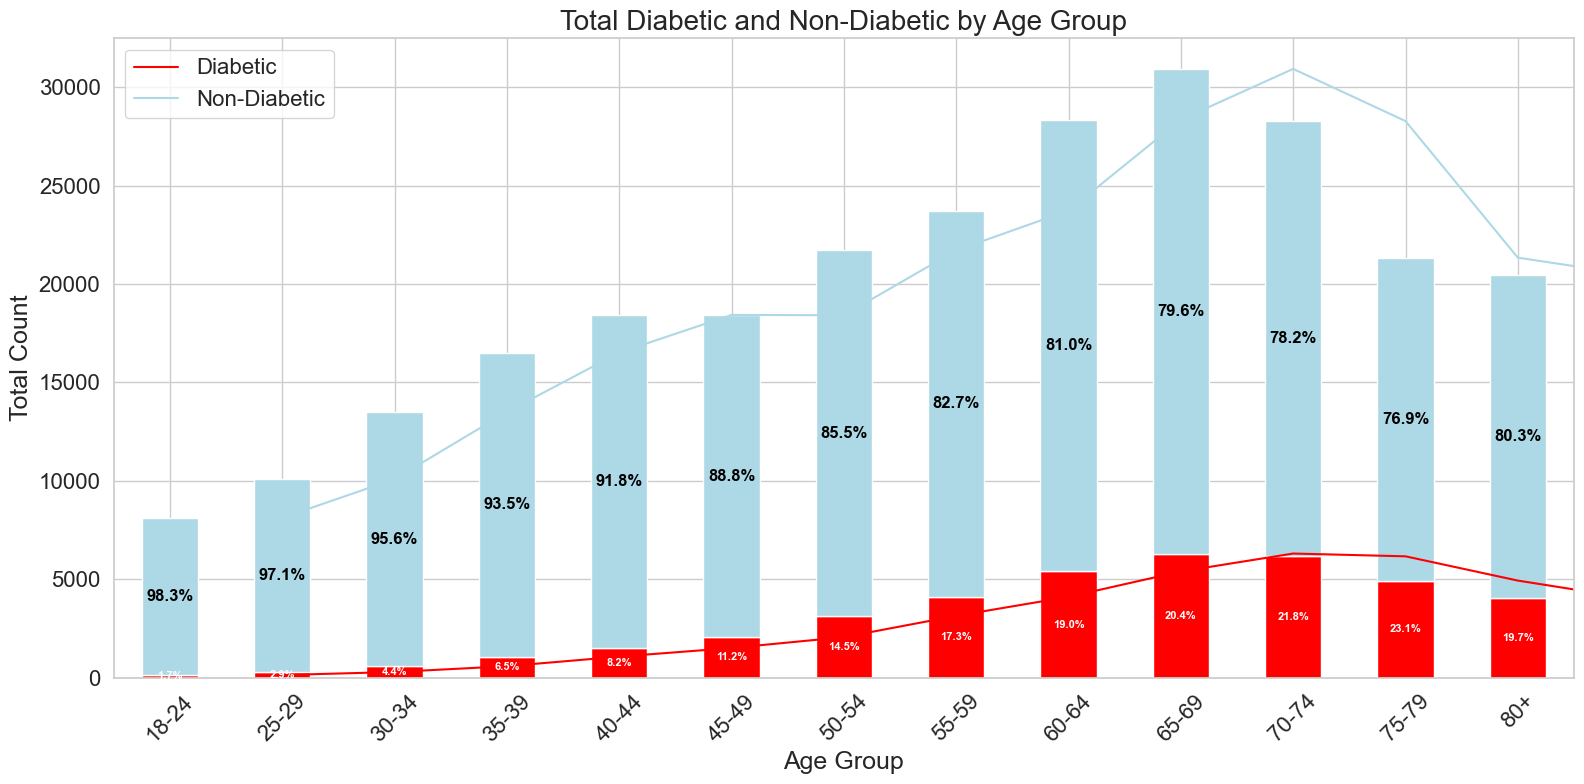

In [381]:
# Mapping ของช่วงอายุ
age_labels = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44',
    6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
    11: '70-74', 12: '75-79', 13: '80+'
}

# Grouping and calculating totals
status_counts = data.groupby(['Age_Group', 'Diabetes_Status']).size().unstack(fill_value=0)
status_counts.columns = ['Non-Diabetic', 'Diabetic']  # Updated column names
status_counts['Total'] = status_counts.sum(axis=1)
status_counts['Non-Diabetic %'] = (status_counts['Non-Diabetic'] / status_counts['Total']) * 100
status_counts['Diabetic %'] = (status_counts['Diabetic'] / status_counts['Total']) * 100

# Reorder columns to place 'Diabetics' first (bottom) and 'Non-Diabetics' second (top)
status_counts = status_counts[['Diabetic', 'Non-Diabetic']]

# Plotting
fig, ax = plt.subplots(figsize=(16, 8))

# Plot stacked bar and line charts
status_counts[['Diabetic', 'Non-Diabetic']].plot(kind='line', stacked=True, color=['red', '#ADD8E6'], ax=ax)
status_counts[['Diabetic', 'Non-Diabetic']].plot(kind='bar', stacked=True, color=['red', '#ADD8E6'], ax=ax)

# แปลงตัวเลขบนแกน x เป็นช่วงอายุ
plt.xticks(
    ticks=range(len(status_counts.index)),
    labels=[age_labels.get(int(x), x) for x in status_counts.index],
    rotation=45
)

# เพิ่มรายละเอียดของกราฟ
ax.set_title('Total Diabetic and Non-Diabetic by Age Group', fontsize=20)
ax.set_xlabel('Age Group', fontsize=18)
ax.set_ylabel('Total Count', fontsize=18)
ax.legend(['Diabetic', 'Non-Diabetic'], fontsize=16)

# เพิ่มขนาดของ tick labels
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Adding annotations for percentages
for n, (diabetics, non_diabetics) in enumerate(zip(status_counts['Diabetic'], status_counts['Non-Diabetic'])):
    total = diabetics + non_diabetics
    diabetics_pct = f'{diabetics / total * 100:.1f}%'
    non_diabetics_pct = f'{non_diabetics / total * 100:.1f}%'
    ax.text(n, diabetics * 0.5, f'{diabetics_pct}', va='center', ha='center', color='white', fontsize=8, fontweight='bold')
    ax.text(n, diabetics + non_diabetics * 0.5, f'{non_diabetics_pct}', va='center', ha='center', color='black', fontsize=12, fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()

# Show the figure
plt.show()

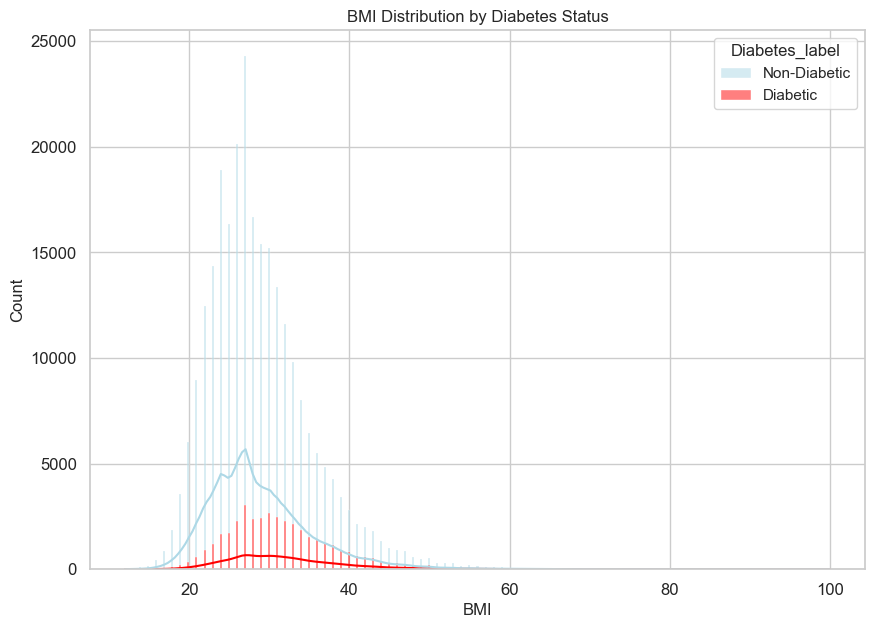

In [382]:
temp_data = data.copy()
temp_data['Diabetes_label'] = temp_data['Diabetes_Status'].replace({0: 'Non-Diabetic', 1: 'Diabetic'})

# Set a custom color palette
custom_palette = {'Non-Diabetic': '#ADD8E6', 'Diabetic': 'red'}

# Set the figure size to make the graph larger
plt.figure(figsize=(10, 7))

# Create the histogram with KDE
sns.histplot(
    data=temp_data,  
    x="BMI",
    hue="Diabetes_label",
    multiple="stack",
    kde=True,
    palette=custom_palette
)

# Add a title and labels
plt.title("BMI Distribution by Diabetes Status", fontsize=12)
plt.xlabel("BMI", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the graph
plt.show()

In [383]:
# since we found some inbalance between those who has diabetes and those who don't, we will 'undersampling' to balance the dataset before further logistic regression.
nodiabetes_sampling = data[data['Diabetes_Status'] == 0].sample(len(data[data['Diabetes_Status'] == 1]))
data_balanced = pd.concat([data[data['Diabetes_Status'] == 1], nodiabetes_sampling])

In [384]:
data_balanced['Diabetes_Status'].value_counts()

Diabetes_Status
1.0    39787
0.0    39787
Name: count, dtype: int64

At this point, we have two datasets.

The first one is original observations with binary value of each attributes. called 'data'.

Antoher one is those with undersampling mathod called 'data_balanced'.

In [385]:
data.shape, data_balanced.shape

((259851, 23), (79574, 23))

In [386]:
data.dtypes

Diabetes_Status              float64
BMI                          float64
Obesity_Indicator            float64
Hypertension                 float64
High_Cholesterol             float64
Cholesterol_Checked          float64
Chronic_Kidney_Disease       float64
Smoker_100_Cigarettes        float64
Heavy_Alcohol_Consumption    float64
Stroke                       float64
Heart_Disease                float64
Physical_Activity            float64
General_Health               float64
Physical_Unhealthy_Days      float64
Mental_Unhealthy_Days        float64
Difficulty_Walking           float64
Health_Care_Coverage         float64
Doctor_Visit_Cost_Issue      float64
Last_Checkup                 float64
Gender                       float64
Age_Group                    float64
Education_Level              float64
Income_Level                 float64
dtype: object

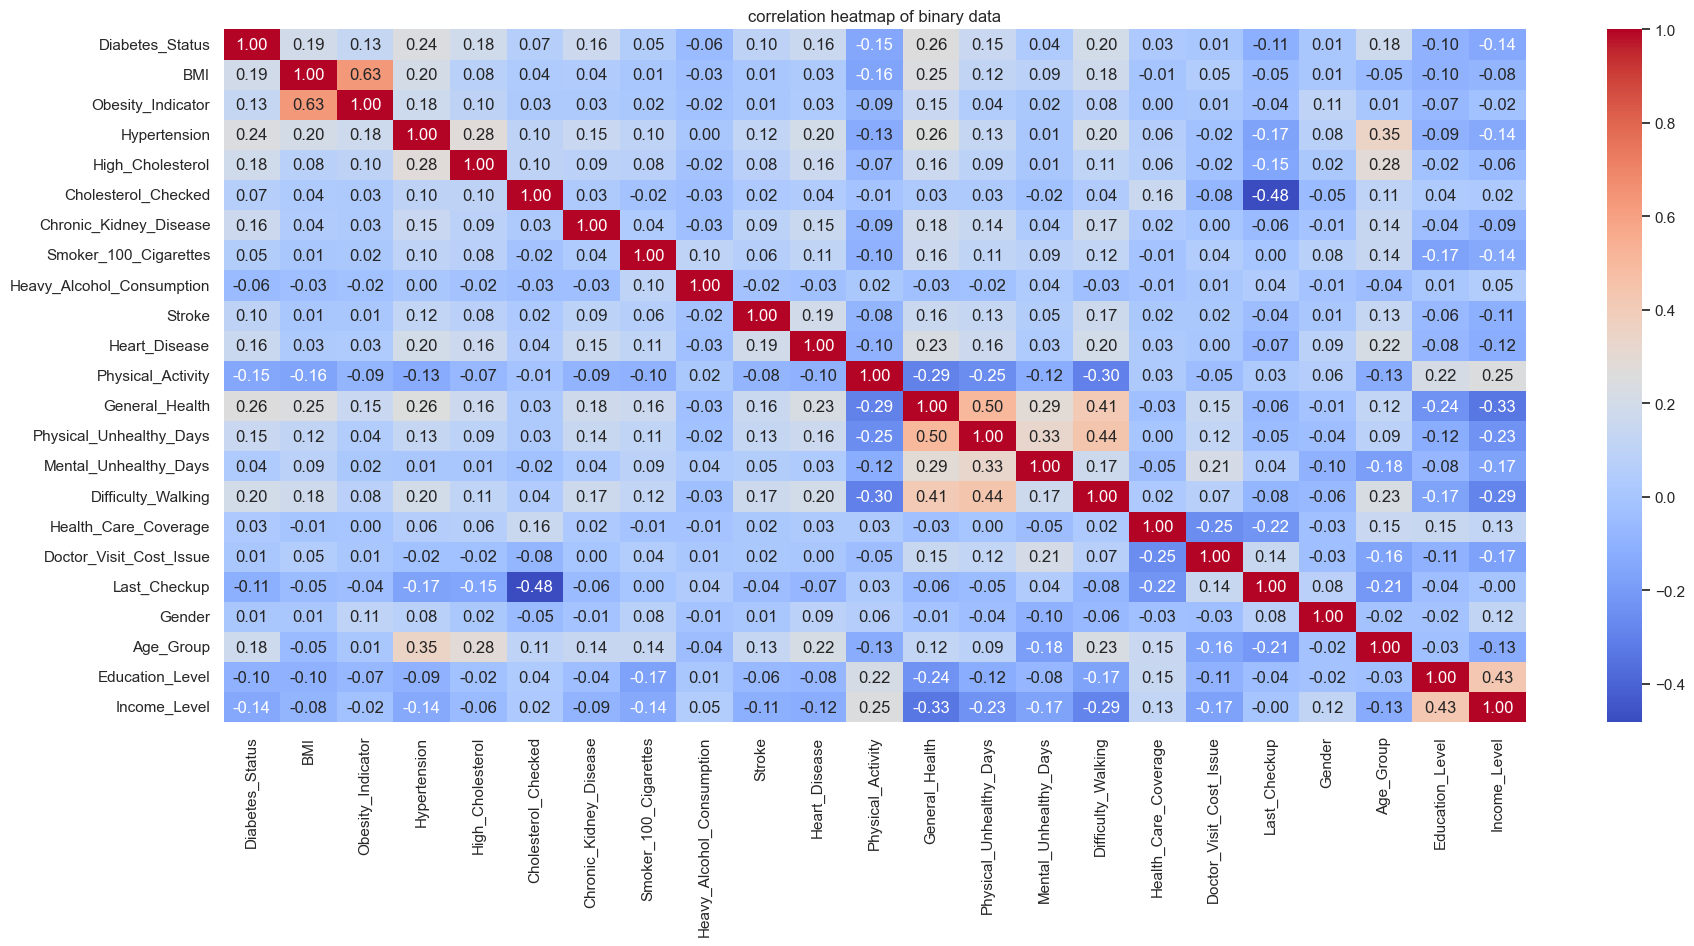

In [387]:
# try make an correlation heatmap
plt.figure(figsize=(21,9))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation heatmap of binary data')
plt.show()


In [388]:
# find out the attribures with best correlation with diabetes
# select top 5 (index 1 to 5) 6 is excluded in accordance with python slicing concept, and 0 is DIABETE4, which is correlation to itself.
data.corr()['Diabetes_Status'].sort_values(ascending=False)[1:6]

General_Health        0.260827
Hypertension          0.244032
Difficulty_Walking    0.199796
BMI                   0.191490
High_Cholesterol      0.183518
Name: Diabetes_Status, dtype: float64

In [389]:
# export those top 5 correlated attributes into a list
top5 = list(data.corr()['Diabetes_Status'].sort_values(ascending=False).index[1:6])

In [390]:
top5

['General_Health',
 'Hypertension',
 'Difficulty_Walking',
 'BMI',
 'High_Cholesterol']

In [391]:
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(data['Diabetes_Status'], data['Hypertension'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Generate LaTeX table with real results
latex_code = rf"""
\begin{{table}}[h!]
\centering
\begin{{tabular}}{{|l|l|}}
\hline
\textbf{{Statistic}}       & \textbf{{Value}} \\ \hline
Chi-Square Statistic        & {chi2:.2f}       \\ \hline
Degrees of Freedom          & {dof}          \\ \hline
P-Value                     & {p:.3f}         \\ \hline
\end{{tabular}}

\vspace{{0.5cm}} % Adjust spacing here

\caption{{Chi-Square Test Results: Association between Diabetes Status and Hypertension}}
\label{{tab:chi_square_results}}
\end{{table}}
"""

# Save to a .tex file
with open("4.Hypertension_chi_square_table.tex", "w") as f:
    f.write(latex_code)

print("LaTeX code with real results written to '4.Hypertension_chi_square_table.tex'")

LaTeX code with real results written to '4.Hypertension_chi_square_table.tex'


In [392]:
contingency_table = pd.crosstab(data['Diabetes_Status'], data['Age_Group'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)


# Generate LaTeX table with real results
latex_code = rf"""
\begin{{table}}[h!]
\centering
\begin{{tabular}}{{|l|l|}}
\hline
\textbf{{Statistic}}       & \textbf{{Value}} \\ \hline
Chi-Square Statistic        & {chi2:.2f}       \\ \hline
Degrees of Freedom          & {dof}          \\ \hline
P-Value                     & {p:.3f}         \\ \hline
\end{{tabular}}

\vspace{{0.5cm}} % Adjust spacing here

\caption{{Chi-Square Test Results: Association between Diabetes Status and Age Group}}
\label{{tab:chi_square_age_group_results}}
\end{{table}}
"""

# Save to a .tex file
with open("5.Age_Group_chi_square_table.tex", "w") as f:
    f.write(latex_code)

print("LaTeX code with real results written to '5.Age_Group_chi_square_table.tex'")

LaTeX code with real results written to '5.Age_Group_chi_square_table.tex'


In [393]:
contingency_table = pd.crosstab(data['Diabetes_Status'], data['Difficulty_Walking'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Generate LaTeX table with real results
latex_code = rf"""
\begin{{table}}[h!]
\centering
\begin{{tabular}}{{|l|l|}}
\hline
\textbf{{Statistic}}       & \textbf{{Value}} \\ \hline
Chi-Square Statistic        & {chi2:.2f}       \\ \hline
Degrees of Freedom          & {dof}          \\ \hline
P-Value                     & {p:.3f}         \\ \hline
\end{{tabular}}

\vspace{{0.5cm}} % Adjust spacing here

\caption{{Chi-Square Test Results: Association between Diabetes Status and Difficulty Walking}}
\label{{tab:chi_square_difficulty_walking_results}}
\end{{table}}
"""

# Save to a .tex file
with open("6.Difficulty_Walking_chi_square_table.tex", "w") as f:
    f.write(latex_code)

print("LaTeX code with real results written to '6.Difficulty_Walking_chi_square_table.tex'")

LaTeX code with real results written to '6.Difficulty_Walking_chi_square_table.tex'


In [394]:
from scipy.stats import ttest_ind

# Divide groups
diabetes_group = data[data['Diabetes_Status'] == 1]['General_Health']
no_diabetes_group = data[data['Diabetes_Status'] == 0]['General_Health']

# Perform T-Test
t_stat, p_val = ttest_ind(diabetes_group, no_diabetes_group)

# Generate LaTeX table with real results
latex_code = rf"""
\begin{{table}}[h!]
\centering
\begin{{tabular}}{{|l|l|}}
\hline
\textbf{{Statistic}}       & \textbf{{Value}} \\ \hline
T-Statistic                & {t_stat:.2f}     \\ \hline
Degrees of Freedom          & {dof}          \\ \hline
P-Value                    & {p_val:.3f}      \\ \hline
\end{{tabular}}

\vspace{{0.5cm}} % Adjust spacing here

\caption{{T-Test Results: General Health Comparison between Diabetes and Non-Diabetes Groups}}
\label{{tab:t_test_general_health_results}}
\end{{table}}
"""

# Save to a .tex file
with open("7.General_Health_t_test_table.tex", "w") as f:
    f.write(latex_code)

print("LaTeX code with real results written to '7.General_Health_t_test_table.tex'")

LaTeX code with real results written to '7.General_Health_t_test_table.tex'


In [395]:
# Divide groups
diabetes_group = data[data['Diabetes_Status'] == 1]['BMI']
no_diabetes_group = data[data['Diabetes_Status'] == 0]['BMI']

# Perform T-Test
t_stat, p_val = ttest_ind(diabetes_group, no_diabetes_group)

# Generate LaTeX table with real results
latex_code = rf"""
\begin{{table}}[h!]
\centering
\begin{{tabular}}{{|l|l|}}
\hline
\textbf{{Statistic}}       & \textbf{{Value}} \\ \hline
T-Statistic                & {t_stat:.2f}     \\ \hline
Degrees of Freedom          & {dof}          \\ \hline
P-Value                    & {p_val:.3f}      \\ \hline
\end{{tabular}}

\vspace{{0.5cm}} % Adjust spacing here

\caption{{T-Test Results: BMI Comparison between Diabetes and Non-Diabetes Groups}}
\label{{tab:t_test_bmi_results}}
\end{{table}}
"""

# Save to a .tex file
with open("8.BMI_t_test_table.tex", "w") as f:
    f.write(latex_code)

print("LaTeX code with real results written to '8.BMI_t_test_table.tex'")

LaTeX code with real results written to '8.BMI_t_test_table.tex'


### Logistic Regression 
At this point, we will develop a logistics regression model based on 2 ways, as we know so far.

##### 1.1 Use 'scikit-learn' to build up logistic regression model 

In [396]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [397]:
'''#Data (Imbalanced) for the case of this sklearn logistics model, we will use balanced data to enhance the prediction accuracy.

# initialize the logistic regression model, ensure convergence for complex datasets by defining max iterations by 1000
model = LogisticRegression(max_iter=1000)

# perform RFE to select the best 5 features
rfe = RFE(estimator = model, n_features_to_select=5)
rfe.fit(data[top5], data['Diabetes_Status'])

# display selected features
selected_features_rfe = data[top5].columns[rfe.support_]
print(selected_features_rfe)'''

"#Data (Imbalanced) for the case of this sklearn logistics model, we will use balanced data to enhance the prediction accuracy.\n\n# initialize the logistic regression model, ensure convergence for complex datasets by defining max iterations by 1000\nmodel = LogisticRegression(max_iter=1000)\n\n# perform RFE to select the best 5 features\nrfe = RFE(estimator = model, n_features_to_select=5)\nrfe.fit(data[top5], data['Diabetes_Status'])\n\n# display selected features\nselected_features_rfe = data[top5].columns[rfe.support_]\nprint(selected_features_rfe)"

In [398]:
# split data into training and testing sets
x = data[top5]
y = data['Diabetes_Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=24)

# train a logistic regression model
model_final = LogisticRegression()
model_final.fit(x_train, y_train)

# evaluate the model
y_pred = model_final.predict(x_test)
print(f'Accuracy: {round(accuracy_score(y_test, y_pred)*100,2)}%')
print('Classification report is as follows: \n', classification_report(y_test, y_pred))


Accuracy: 84.97%
Classification report is as follows: 
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     65978
         1.0       0.55      0.11      0.18     11978

    accuracy                           0.85     77956
   macro avg       0.71      0.55      0.55     77956
weighted avg       0.81      0.85      0.80     77956



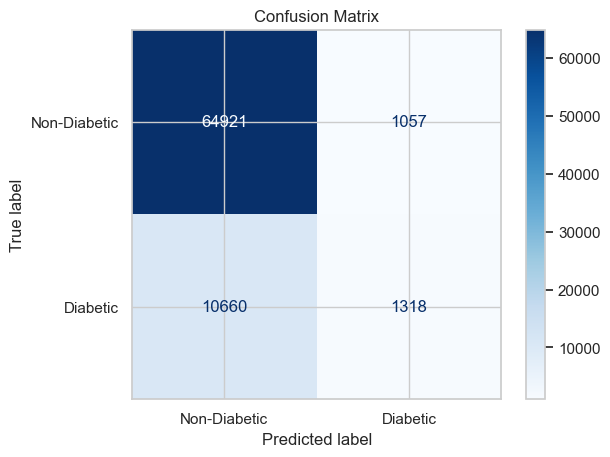

In [399]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Diabetic', 'Diabetic'])

# Plot the Confusion Matrix
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [400]:
'''#Data (Balanced) for the case of this sklearn logistics model, we will use balanced data to enhance the prediction accuracy.

# initialize the logistic regression model, ensure convergence for complex datasets by defining max iterations by 1000
model = LogisticRegression(max_iter=1000)

# perform RFE to select the best 5 features
rfe = RFE(estimator = model, n_features_to_select=5)
rfe.fit(data_balanced[top5], data_balanced['Diabetes_Status'])

# display selected features
selected_features_rfe = data_balanced[top5].columns[rfe.support_]
print(selected_features_rfe)'''

"#Data (Balanced) for the case of this sklearn logistics model, we will use balanced data to enhance the prediction accuracy.\n\n# initialize the logistic regression model, ensure convergence for complex datasets by defining max iterations by 1000\nmodel = LogisticRegression(max_iter=1000)\n\n# perform RFE to select the best 5 features\nrfe = RFE(estimator = model, n_features_to_select=5)\nrfe.fit(data_balanced[top5], data_balanced['Diabetes_Status'])\n\n# display selected features\nselected_features_rfe = data_balanced[top5].columns[rfe.support_]\nprint(selected_features_rfe)"

In [401]:
# split data into training and testing sets
x = data_balanced[top5]
y = data_balanced['Diabetes_Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=24)

# train a logistic regression model
model_final = LogisticRegression()
model_final.fit(x_train, y_train)

# evaluate the model
y_pred = model_final.predict(x_test)
print(f'Accuracy: {round(accuracy_score(y_test, y_pred)*100,2)}%')
print('Classification report is as follows: \n', classification_report(y_test, y_pred))


Accuracy: 70.42%
Classification report is as follows: 
               precision    recall  f1-score   support

         0.0       0.71      0.69      0.70     11945
         1.0       0.70      0.72      0.71     11928

    accuracy                           0.70     23873
   macro avg       0.70      0.70      0.70     23873
weighted avg       0.70      0.70      0.70     23873



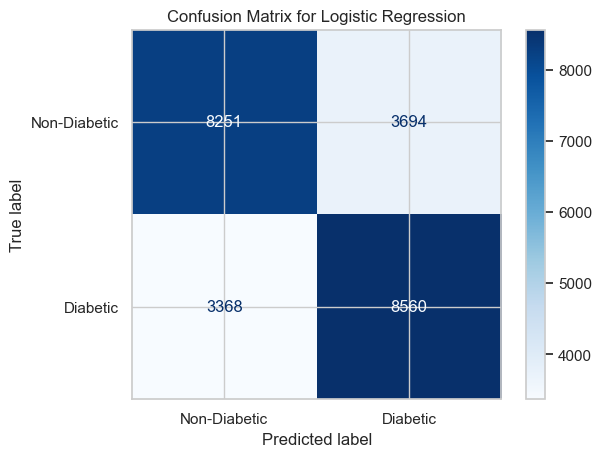

In [402]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Diabetic', 'Diabetic'])
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix for Logistic Regression")
plt.show()